Name: Amity Lu

Github Username: Amitywen

In [261]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor as KNN
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import DistanceMetric

Question 1:

heights: 150, 155, 165, 190

estimate weight: 74.33333333, 74.33333333, 80.33333333, 87.66666667

In [262]:
# HW1_1
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
# https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php

train_x = [[171],[168],[191],[182],[150],[178]]
train_y = [80,78,100,80,65,83]
nbrs = KNN(n_neighbors=3).fit(train_x,train_y)

test = [[150],[155],[165],[190]]
nbrs.predict(test)

array([74.33333333, 74.33333333, 80.33333333, 87.66666667])

Question 2:

heights: 150, 155, 165, 190

estimate weight: 65.        , 70.7082153 , 79.24444444, 96.75862069

In [263]:
# HW1_2
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

train_x = [[171],[168],[191],[182],[150],[178]]
train_y = [80,78,100,80,65,83]
nbrs = KNN(n_neighbors=3, weights='distance').fit(train_x,train_y)
# weight = ‘distance’ : weight points by the inverse of their distance.

test = [[150],[155],[165],[190]]
nbrs.predict(test)

array([65.        , 70.7082153 , 79.24444444, 96.75862069])

Question 7:

In [264]:
# reference: https://www.geeksforgeeks.org/python-program-to-replace-text-in-a-file/

# Read in the file
with open('Q7_data.dat', 'r') as file :
  filedata = file.read()

# Replace the target string
filedata = filedata.replace('NO', '0')
filedata = filedata.replace('AB', '1')

with open('Q7_data.dat', 'w')as file:
  file.write(filedata)


attr = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope numeric','pelvic_radius ','degree_spondylolisthesis','class']
data = np.loadtxt('Q7_data.dat')
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6
0,63.03,22.55,39.61,40.48,98.67,-0.25,1.0
1,39.06,10.06,25.02,29.00,114.41,4.56,1.0
2,68.83,22.22,50.09,46.61,105.99,-3.53,1.0
3,69.30,24.65,44.31,44.64,101.87,11.21,1.0
4,49.71,9.65,28.32,40.06,108.17,7.92,1.0
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0.0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0.0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0.0
308,45.25,8.69,41.58,36.56,118.55,0.21,0.0


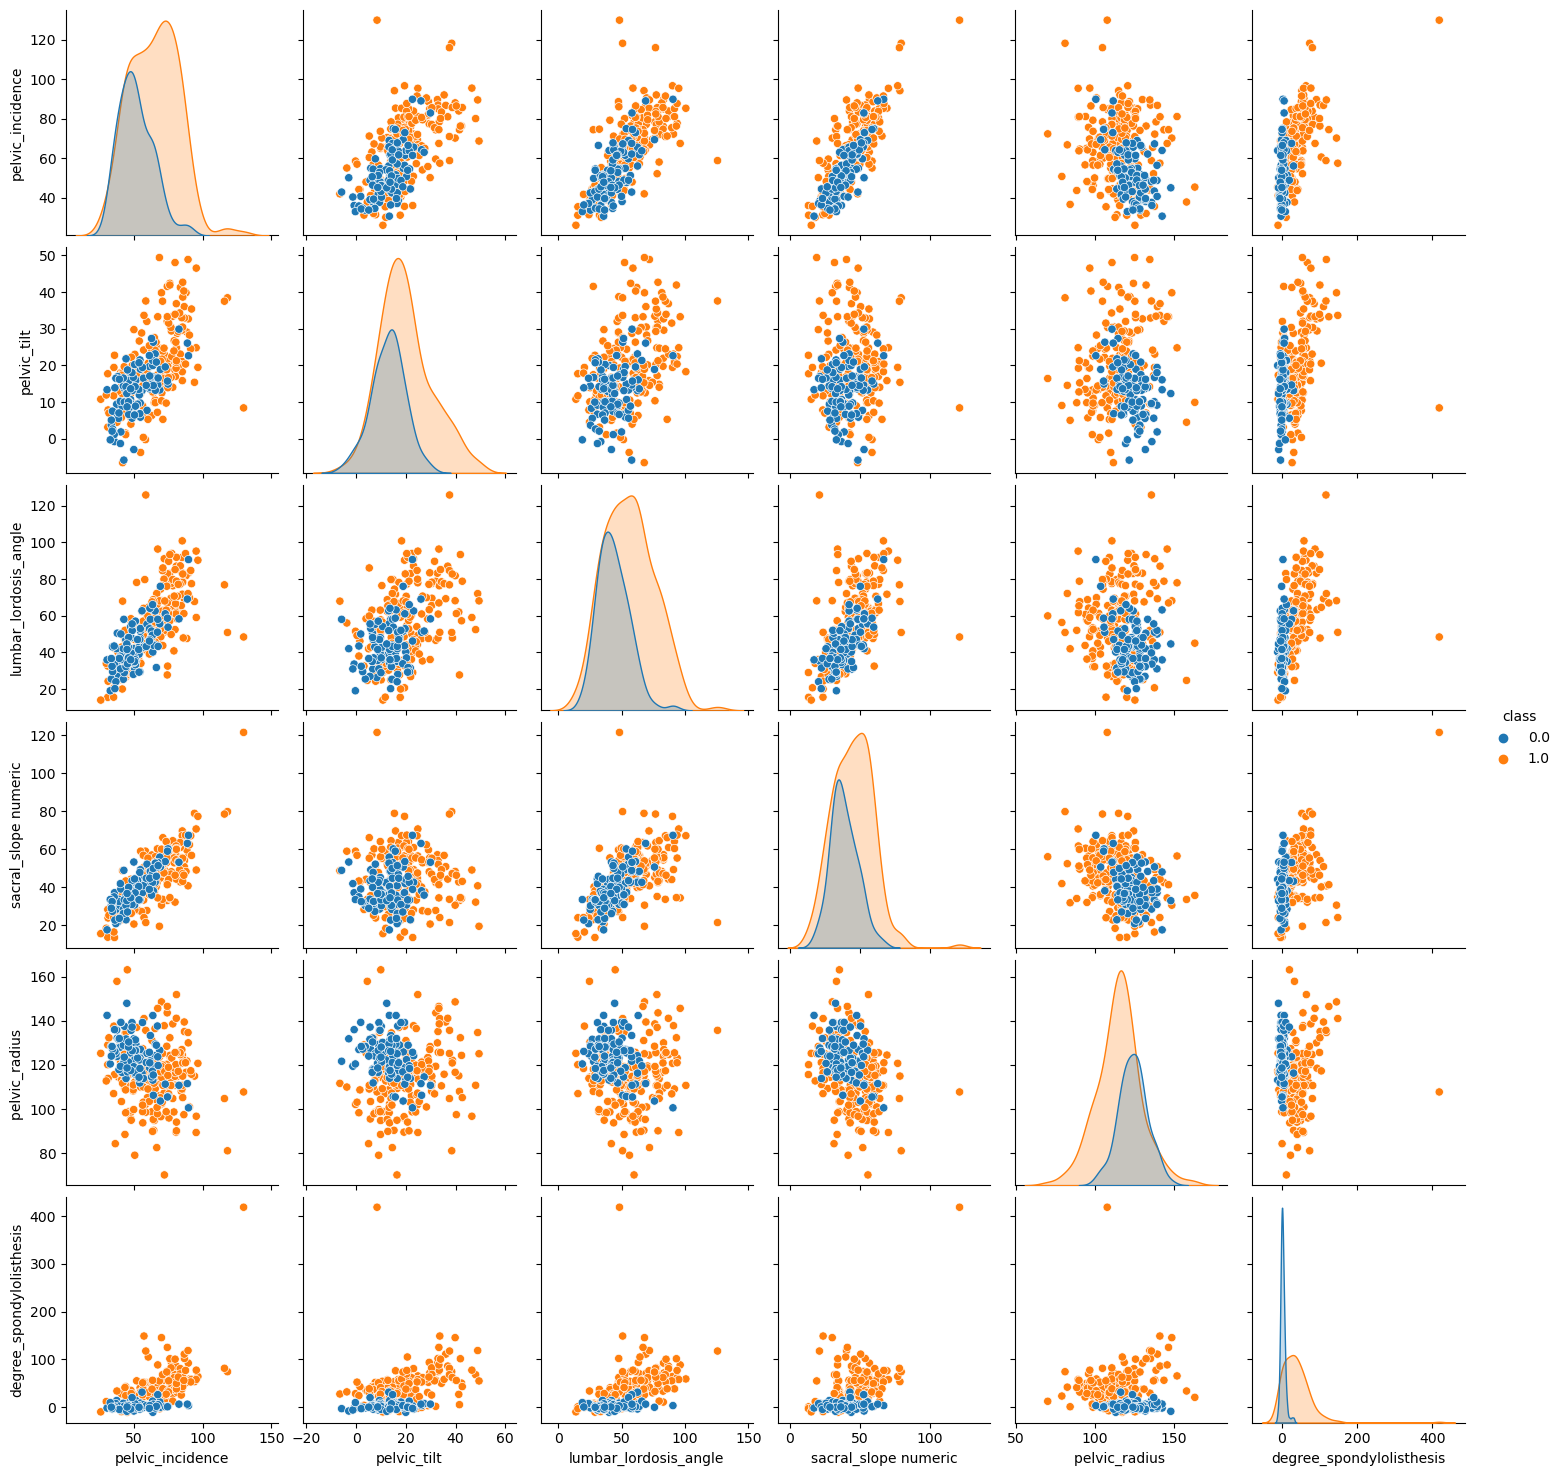

In [265]:
# making scatterplots of the independent variables
df_name = df
for i in range(7):
    df_name = df_name.rename({i: attr[i]}, axis=1)

sns.pairplot(df_name, hue='class')


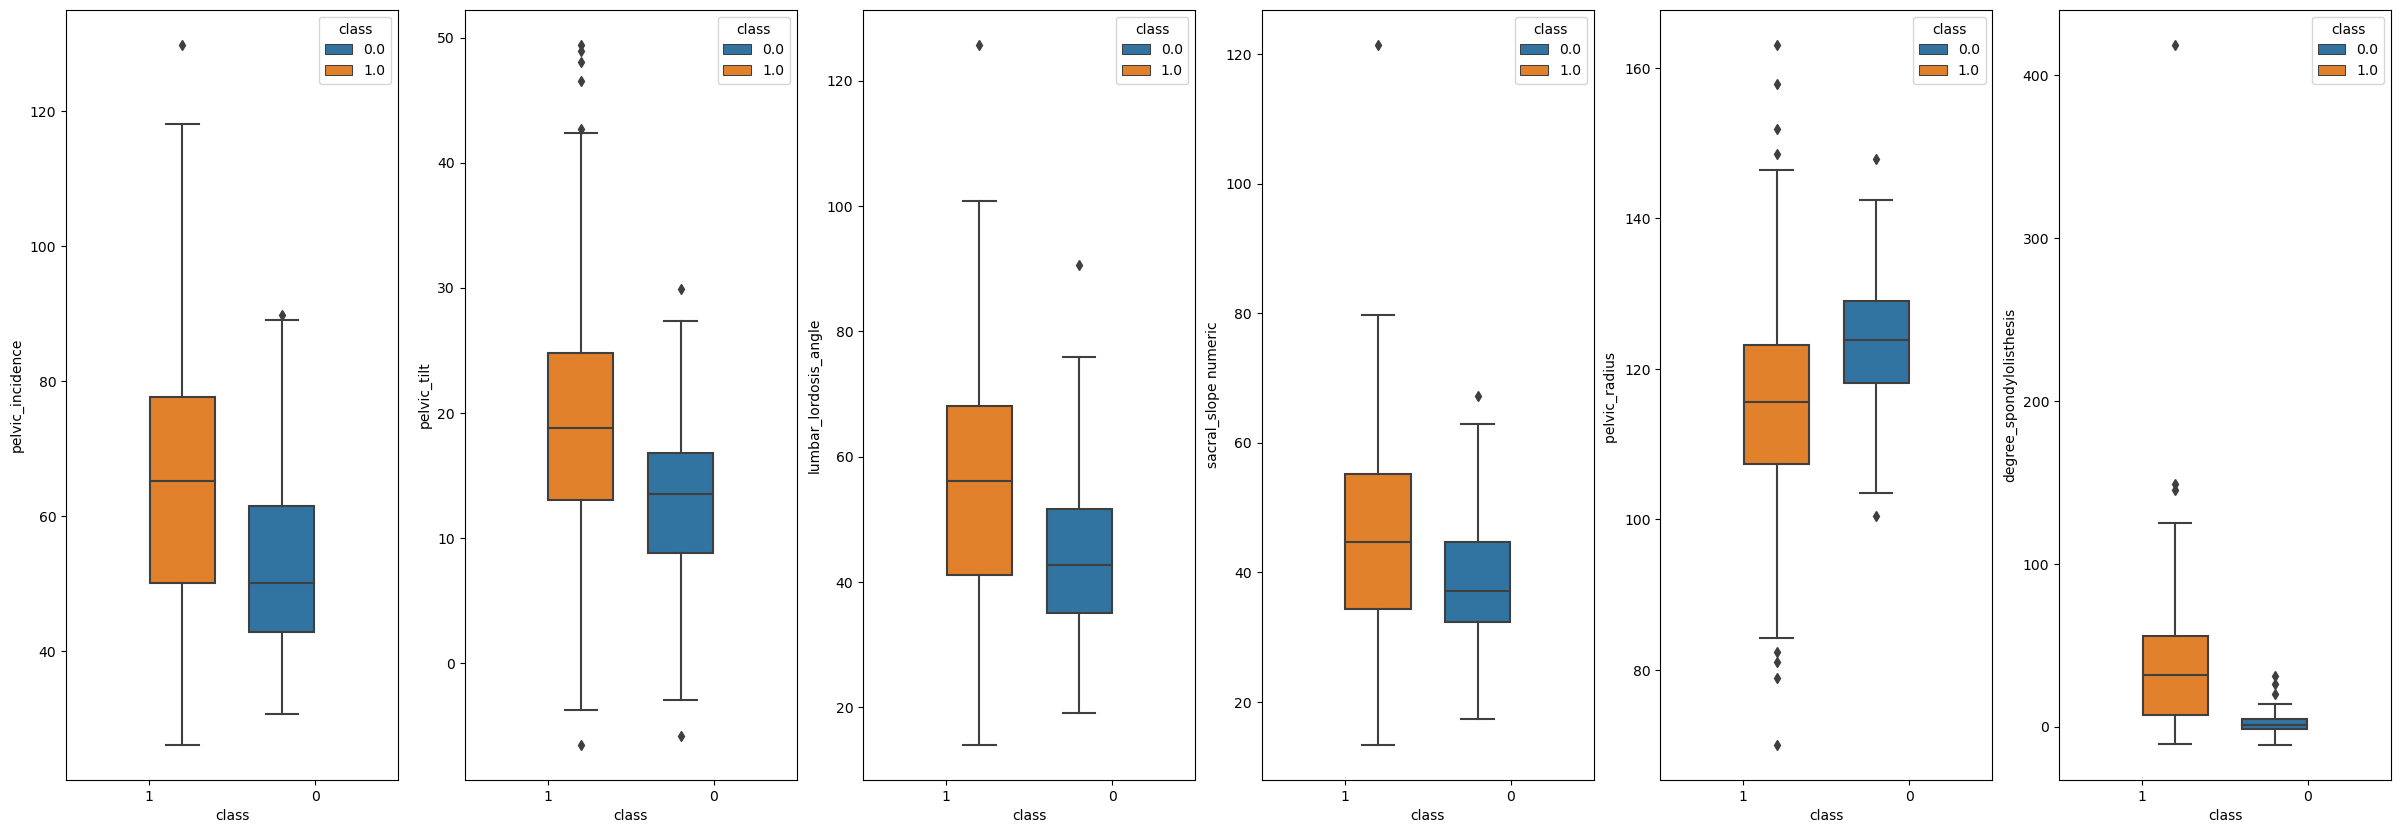

In [266]:
# make boxplots for each of the independent variables
# reference: https://seaborn.pydata.org/generated/seaborn.boxplot.html
# reference2: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
# https://pandas.pydata.org/docs/user_guide/visualization.html

s = pd.Series(data=df_name.iloc[:,6])
col = s.map({0:'0', 1:'1'})

fig, axs = plt.subplots(1,6, figsize=(30, 10))

for i in range(6):
    sns.boxplot(ax = axs[i], data = df_name, y = attr[i], x = col, hue='class')

# for i in range(6):
#     plt.figure(i)
#     sns.boxplot(data = df_name, x = attr[i], y = col, hue='class')

plt.show()

In [267]:
r, c = df_name.shape
df_0 = pd.DataFrame()
df_1 = pd.DataFrame()

for i in range(r):
    new_row = pd.Series(df_name.iloc[i,:])
    if df_name.iloc[i,6] == 0:
        df_0 = pd.concat([df_0, new_row.to_frame().T],ignore_index=True)
    else:
        df_1 = pd.concat([df_1, new_row.to_frame().T],ignore_index=True)

# Select the first 70 rows of Class0
train_x0 = pd.DataFrame(data = df_0.iloc[:70,:6])
train_y0 = pd.DataFrame(data = df_0.iloc[:70,6])

# Select the first 140 rows of Class 1
train_x1 = pd.DataFrame(data = df_1.iloc[:140,:6])
train_y1 = pd.DataFrame(data = df_1.iloc[:140,6])

Q3_train_x = pd.concat([train_x0, train_x1],ignore_index=True)
Q3_train_y = pd.concat([train_y0, train_y1],ignore_index=True)

# rest of them are test set
test_x0 = pd.DataFrame(data = df_0.iloc[70:,:6])
test_x1 = pd.DataFrame(data = df_1.iloc[140:,:6])
test_y0 = pd.DataFrame(data = df_0.iloc[70:,6])
test_y1 = pd.DataFrame(data = df_1.iloc[140:,6])

Q3_test_x = pd.concat([test_x0, test_x1],ignore_index=True)
Q3_test_y = pd.concat([test_y0, test_y1],ignore_index=True)
r, df_0.shape, df_1.shape, train_x0.shape, train_x1.shape, test_x0.shape, test_x1.shape,train_y0.shape,train_y1.shape

(310,
 (100, 7),
 (210, 7),
 (70, 6),
 (140, 6),
 (30, 6),
 (70, 6),
 (70, 1),
 (140, 1))

<Axes: xlabel='k', ylabel='Error rate'>

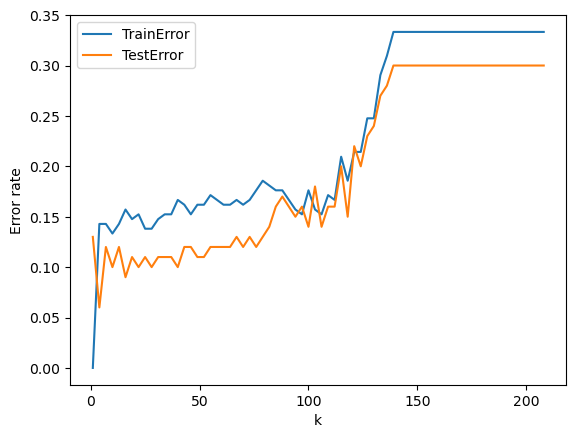

In [268]:
# MSE reference: https://www.geeksforgeeks.org/python-mean-squared-error/

k = 208
Error = pd.DataFrame(columns=['TrainError','TestError'])

for i in range(k):
    if k>0:
        model_3 = KNC(n_neighbors=k, metric='euclidean').fit(Q3_train_x,Q3_train_y.iloc[:,0])
        pred_y3train = model_3.predict(Q3_train_x) 
        pred_y3test = model_3.predict(Q3_test_x)
        diff = 0

        err_train = 0
        for i in range(np.size(pred_y3train)):
            diff = pred_y3train[i] - Q3_train_y.iloc[i]
            if diff[0] != 0:
                err_train += 1
        err_train = err_train / np.size(pred_y3train)

        err_test = 0
        for i in range(np.size(pred_y3test)):
            diff = pred_y3test[i] - Q3_test_y.iloc[i]
            if diff[0] != 0:
                err_test += 1
        
        err_test = err_test / np.size(pred_y3test)
        
        err = pd.DataFrame({'TrainError': [err_train], 'TestError': [err_test]},index=[k])     
        
        Error = pd.concat([Error, err])


        k = k-3

Error.plot.line(xlabel='k',ylabel='Error rate')

In [269]:
Error

,TrainError,TestError
208,0.333333,0.30
205,0.333333,0.30
202,0.333333,0.30
199,0.333333,0.30
196,0.333333,0.30
...,...,...
13,0.142857,0.12
10,0.133333,0.10
7,0.142857,0.12
4,0.142857,0.06


In [270]:
r,c = Error.shape
best_k = 1

for i in range(r):
    if Error.iloc[i,1] < Error.loc[best_k,'TestError'] :
        best_k = Error.index[i]

best_k

4

In [271]:
model_3_bestk = KNC(n_neighbors = best_k, metric='euclidean').fit(Q3_train_x,Q3_train_y.iloc[:,0])
pred_y3test = model_3_bestk.predict(Q3_test_x)
conf_matrix_test = confusion_matrix(Q3_test_y, pred_y3test)
conf_matrix_test

array([[25,  5],
       [ 1, 69]])

In [272]:
from sklearn.metrics import f1_score
FP = conf_matrix_test[0,1]
FN = conf_matrix_test[1,0]
TP = conf_matrix_test[0,0]
TN = conf_matrix_test[1,1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP+FN)
print('true positive rate:', TPR)
# Specificity or true negative rate
TNR = TN / (TN+FP) 
print('true negative rate:',TNR)
# Precision or positive predictive value
PPV = TP / (TP+FP)
print('Precision:',PPV)
print('f1_score:',f1_score(Q3_test_y, pred_y3test))
# Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)
# Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)

true positive rate: 0.9615384615384616
true negative rate: 0.9324324324324325
Precision: 0.8333333333333334
f1_score: 0.9583333333333333


Question7 (c)iii

In [273]:
N = 210
Error_7c = pd.DataFrame(columns=['N','k','TrainError','TestError'])

for i in range(N):
    if N>0:
        n = round(N/3)
        # Select the first [N/3] rows of Class0
        train_x0c = pd.DataFrame(data = df_0.iloc[:n,:6])
        train_y0c = pd.DataFrame(data = df_0.iloc[:n,6])

        # Select the first [N-[N/3]] rows of Class 1
        train_x1c = pd.DataFrame(data = df_1.iloc[:(N-n),:6])
        train_y1c = pd.DataFrame(data = df_1.iloc[:(N-n),6])
        Q7c_train_x = pd.concat([train_x0c, train_x1c],ignore_index=True)
        Q7c_train_y = pd.concat([train_y0c, train_y1c],ignore_index=True)  
        # rest of them are test set
        test_x0c = pd.DataFrame(data = df_0.iloc[n:,:6])
        test_x1c = pd.DataFrame(data = df_1.iloc[N-n:,:6])
        test_y0c = pd.DataFrame(data = df_0.iloc[n:,6])
        test_y1c = pd.DataFrame(data = df_1.iloc[N-n:,6])
        Q7c_test_x = pd.concat([test_x0c, test_x1c],ignore_index=True)
        Q7c_test_y = pd.concat([test_y0c, test_y1c],ignore_index=True)

        # find the error rate
        k = 1
        for i in range(196):
            if k < 197 and k < N :
                model_7c = KNC(n_neighbors=k, metric='euclidean').fit(Q7c_train_x,Q7c_train_y.iloc[:,0])
                pred_y7ctrain = model_7c.predict(Q7c_train_x) 
                pred_y7ctest = model_7c.predict(Q7c_test_x)
                diff = 0

                err_train = 0
                for i in range(np.size(pred_y7ctrain)):
                    diff = pred_y7ctrain[i] - Q7c_train_y.iloc[i]
                    if diff[0] != 0:
                        err_train += 1
                
                err_train = err_train / np.size(pred_y7ctrain)

                err_test = 0
                for i in range(np.size(pred_y7ctest)):
                    diff = pred_y7ctest[i] - Q7c_test_y.iloc[i]
                    if diff[0] != 0:
                        err_test += 1
                
                err_test = err_test / np.size(pred_y7ctest)
                
                err = pd.DataFrame({'N':[N],'k':[k],'TrainError': [err_train], 'TestError': [err_test]})     
                
                Error_7c = pd.concat([Error_7c, err],ignore_index=True)


                k += 5


        N -= 10

Error_7c

,N,k,TrainError,TestError
0,210,1,0.000000,0.130000
1,210,6,0.147619,0.080000
2,210,11,0.147619,0.120000
3,210,16,0.157143,0.090000
4,210,21,0.138095,0.100000
...,...,...,...,...
455,20,6,0.250000,0.220690
456,20,11,0.150000,0.296552
457,20,16,0.350000,0.320690
458,10,1,0.000000,0.280000


In [274]:
r,c = Error_7c.shape
N = []
n = 210
for j in range(n):
    if n > 0:
        N.append(n)
    n -= 10

best_k_error_7c = pd.DataFrame(columns=['N','k','TrainError','TestError'])
now = 0

for j in N:
    best_k_7c = now
    for p in range(r):
        if (Error_7c.iloc[p,0]) == j:   
            if Error_7c.iloc[p,3] < Error_7c.iloc[best_k_7c,3]:
                best_k_7c = p
            
            now += 1
    
    best7c = pd.DataFrame({'N':[j],'k':Error_7c.iloc[best_k_7c,1],'TrainError': Error_7c.iloc[best_k_7c,2], 'TestError': Error_7c.iloc[best_k_7c,3]})
    best_k_error_7c = pd.concat([best_k_error_7c, best7c],ignore_index=True)

best_k_error_7c

,N,k,TrainError,TestError
0,210,6,0.147619,0.080000
1,200,6,0.150000,0.081818
2,190,6,0.147368,0.075000
3,180,6,0.155556,0.084615
4,170,6,0.164706,0.107143
5,160,6,0.175000,0.113333
6,150,16,0.180000,0.131250
7,140,26,0.192857,0.129412
8,130,16,0.184615,0.155556
9,120,16,0.191667,0.152632


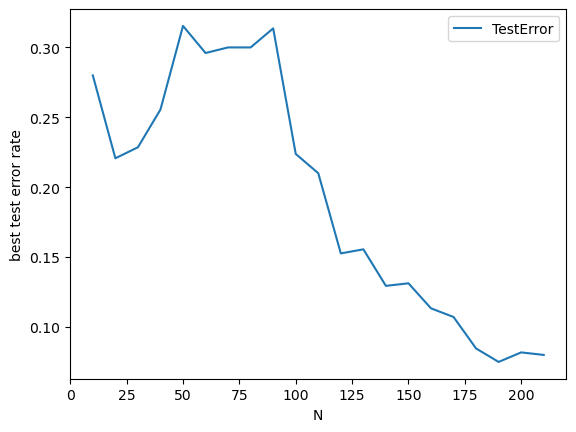

In [275]:
ax = best_k_error_7c.plot(x='N',y='TestError',xlabel='N',ylabel='best test error rate')

Question 7 (d)

In [276]:
def TrainingData(trainx,trainy,testx,testy,metrix,p,Error,k):
    k = k
    for i in range(k):
        if k>0:
            model = KNC(n_neighbors=k, metric=metrix, p = p ).fit(trainx,trainy.iloc[:,0])
            predytrain = model.predict(trainx) 
            predytest = model.predict(testx)
            diff = 0

            err_train = 0
            for i in range(np.size(predytrain)):
                diff =  predytrain[i] - trainy.iloc[i]
                if diff[0] != 0:
                    err_train += 1
            err_train = err_train / np.size( predytrain)

            err_test = 0
            for i in range(np.size(predytest)):
                diff = predytest[i] - testy.iloc[i]
                if diff[0] != 0:
                    err_test += 1
            
            err_test = err_test / np.size(testy)
            
            err = pd.DataFrame({'TrainError': [err_train], 'TestError': [err_test]},index=[k])     
            
            Error = pd.concat([Error, err])


            k -= 5
    
    return Error


In [277]:
def TrainingDataCertaink(trainx,trainy,testx,testy,metrix,p,Error,k):
    model = KNC(n_neighbors=k, metric=metrix, p = p ).fit(trainx,trainy.iloc[:,0])
    predytrain = model.predict(trainx) 
    predytest = model.predict(testx)
    diff = 0

    err_train = 0
    for i in range(np.size(predytrain)):
        diff =  predytrain[i] - trainy.iloc[i]
        if diff[0] != 0:
            err_train += 1
    err_train = err_train / np.size( predytrain)

    err_test = 0
    for i in range(np.size(predytest)):
        diff = predytest[i] - testy.iloc[i]
        if diff[0] != 0:
            err_test += 1
    
    err_test = err_test / np.size(testy)
    
    err = pd.DataFrame({'TrainError': [err_train], 'TestError': [err_test]},index=[k])     
    
    Error = pd.concat([Error, err])

    return Error


In [278]:
def bestk(Error):
    r,c = Error.shape
    best_k = 1

    for i in range(r):
        if Error.iloc[i,1] < Error.loc[best_k,'TestError'] :
            # becasue the k is decreasing order, hence, even there is other k has same TestError, choosing the larger k
            best_k = Error.index[i]

    return best_k

Manhattan Distance

Minkowski Distance with p = 1

In [279]:
#reference: https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php

Error_7dA = pd.DataFrame(columns=['TrainError','TestError'])
Error_7dA = TrainingData(Q3_train_x,Q3_train_y,Q3_test_x,Q3_test_y,'minkowski',1,Error_7dA,196)
Error_7dA
print(Error_7dA)
print('the best k is', bestk(Error_7dA))

     TrainError  TestError
196    0.333333       0.30
191    0.333333       0.30
186    0.333333       0.30
181    0.333333       0.30
176    0.333333       0.30
171    0.333333       0.30
166    0.333333       0.30
161    0.333333       0.30
156    0.333333       0.30
151    0.333333       0.30
146    0.333333       0.30
141    0.333333       0.30
136    0.323810       0.28
131    0.304762       0.28
126    0.261905       0.24
121    0.242857       0.22
116    0.228571       0.21
111    0.219048       0.23
106    0.204762       0.21
101    0.200000       0.22
96     0.176190       0.20
91     0.180952       0.20
86     0.152381       0.15
81     0.166667       0.16
76     0.180952       0.14
71     0.176190       0.14
66     0.180952       0.15
61     0.176190       0.15
56     0.185714       0.13
51     0.171429       0.14
46     0.171429       0.13
41     0.166667       0.13
36     0.161905       0.13
31     0.166667       0.12
26     0.166667       0.11
21     0.147619       0.12
1

Manhattan Distance

Minkowski Distance with log(p)

In [280]:
p = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

Error_7dB = pd.DataFrame(columns=['TrainError','TestError'])

for i in p:
    pp = pow(10,i)
    Error_7dB = TrainingDataCertaink(Q3_train_x,Q3_train_y,Q3_test_x,Q3_test_y,'minkowski',pp,Error_7dB,bestk(Error_7dA))

Error_7dB = Error_7dB.set_index(pd.Series(p))

r,c = Error_7dB.shape

print(Error_7dB)

#find the best p
best_p = 0.1
for i in range(r):
    if Error_7dB.iloc[i,1] < Error_7dB.loc[best_p,'TestError']:
        best_p = Error_7dB.index[i]


print('the best p is', best_p)      

     TrainError  TestError
0.1    0.161905       0.10
0.2    0.147619       0.10
0.3    0.142857       0.11
0.4    0.138095       0.10
0.5    0.138095       0.11
0.6    0.138095       0.10
0.7    0.142857       0.11
0.8    0.147619       0.11
0.9    0.147619       0.11
1.0    0.152381       0.11
the best p is 0.1


Chebyshev Distance

In [281]:
Error_7dC = pd.DataFrame(columns=['TrainError','TestError'])
Error_7dC = TrainingData(Q3_train_x,Q3_train_y,Q3_test_x,Q3_test_y,'chebyshev',None,Error_7dC,196)

print(Error_7dC)
print('the best k is', bestk(Error_7dC))


     TrainError  TestError
196    0.333333       0.30
191    0.333333       0.30
186    0.333333       0.30
181    0.333333       0.30
176    0.333333       0.30
171    0.333333       0.30
166    0.333333       0.30
161    0.333333       0.30
156    0.333333       0.30
151    0.333333       0.30
146    0.333333       0.30
141    0.333333       0.30
136    0.319048       0.28
131    0.247619       0.25
126    0.223810       0.21
121    0.209524       0.21
116    0.176190       0.19
111    0.180952       0.18
106    0.176190       0.18
101    0.171429       0.19
96     0.161905       0.14
91     0.157143       0.15
86     0.171429       0.12
81     0.171429       0.14
76     0.176190       0.11
71     0.180952       0.14
66     0.161905       0.13
61     0.171429       0.14
56     0.166667       0.12
51     0.166667       0.12
46     0.161905       0.12
41     0.142857       0.13
36     0.152381       0.10
31     0.142857       0.12
26     0.157143       0.12
21     0.133333       0.11
1

Question7 (e)

In [282]:
def TrainingDataWeight(trainx,trainy,testx,testy,metrix,p,Error,k):
    k = k
    for i in range(k):
        if k>0:
            model = KNC(n_neighbors=k, metric=metrix, p = p,weights='distance').fit(trainx,trainy.iloc[:,0])
            predytrain = model.predict(trainx) 
            predytest = model.predict(testx)
            diff = 0

            err_train = 0
            for i in range(np.size(predytrain)):
                diff =  predytrain[i] - trainy.iloc[i]
                if diff[0] != 0:
                    err_train += 1
            err_train = err_train / np.size( predytrain)

            err_test = 0
            for i in range(np.size(predytest)):
                diff = predytest[i] - testy.iloc[i]
                if diff[0] != 0:
                    err_test += 1
            
            err_test = err_test / np.size(testy)
            
            err = pd.DataFrame({'TrainError': [err_train], 'TestError': [err_test]},index=[k])     
            
            Error = pd.concat([Error, err])


            k -= 5
    
    return Error


In [283]:
# with Euclidean
Error_7e1 = pd.DataFrame(columns=['TrainError','TestError'])
Error_7e1  = TrainingDataWeight(Q3_train_x,Q3_train_y,Q3_test_x,Q3_test_y,'minkowski',2,Error_7e1 ,196)

print(Error_7e1 )
print('the best k is:', bestk(Error_7e1),'the best TestError is:',Error_7e1.loc[bestk(Error_7e1),'TestError'])

     TrainError  TestError
196         0.0       0.28
191         0.0       0.28
186         0.0       0.27
181         0.0       0.27
176         0.0       0.27
171         0.0       0.27
166         0.0       0.25
161         0.0       0.23
156         0.0       0.20
151         0.0       0.19
146         0.0       0.19
141         0.0       0.17
136         0.0       0.14
131         0.0       0.14
126         0.0       0.13
121         0.0       0.13
116         0.0       0.13
111         0.0       0.14
106         0.0       0.14
101         0.0       0.12
96          0.0       0.14
91          0.0       0.14
86          0.0       0.13
81          0.0       0.13
76          0.0       0.12
71          0.0       0.11
66          0.0       0.11
61          0.0       0.11
56          0.0       0.11
51          0.0       0.11
46          0.0       0.11
41          0.0       0.11
36          0.0       0.11
31          0.0       0.11
26          0.0       0.11
21          0.0       0.11
1

In [284]:
# with Manhattan
Error_7e2 = pd.DataFrame(columns=['TrainError','TestError'])
Error_7e2  = TrainingDataWeight(Q3_train_x,Q3_train_y,Q3_test_x,Q3_test_y,'minkowski',1,Error_7e2,196)

print(Error_7e2)
print('the best k is:', bestk(Error_7e2),'the best TestError is:',Error_7e2.loc[bestk(Error_7e2),'TestError'])

     TrainError  TestError
196         0.0       0.29
191         0.0       0.28
186         0.0       0.27
181         0.0       0.27
176         0.0       0.27
171         0.0       0.27
166         0.0       0.25
161         0.0       0.24
156         0.0       0.21
151         0.0       0.19
146         0.0       0.18
141         0.0       0.17
136         0.0       0.16
131         0.0       0.15
126         0.0       0.15
121         0.0       0.15
116         0.0       0.15
111         0.0       0.15
106         0.0       0.15
101         0.0       0.15
96          0.0       0.13
91          0.0       0.13
86          0.0       0.14
81          0.0       0.14
76          0.0       0.12
71          0.0       0.11
66          0.0       0.13
61          0.0       0.13
56          0.0       0.12
51          0.0       0.12
46          0.0       0.11
41          0.0       0.11
36          0.0       0.11
31          0.0       0.11
26          0.0       0.10
21          0.0       0.11
1

In [285]:
# with Chebyshev
Error_7e3 = pd.DataFrame(columns=['TrainError','TestError'])
Error_7e3 = TrainingDataWeight(Q3_train_x,Q3_train_y,Q3_test_x,Q3_test_y,'chebyshev',None,Error_7e3,196)

print(Error_7e3)
print('the best k is:', bestk(Error_7e3),'the best TestError is:',Error_7e3.loc[bestk(Error_7e3),'TestError'])

     TrainError  TestError
196         0.0       0.28
191         0.0       0.27
186         0.0       0.27
181         0.0       0.27
176         0.0       0.26
171         0.0       0.26
166         0.0       0.26
161         0.0       0.23
156         0.0       0.21
151         0.0       0.21
146         0.0       0.19
141         0.0       0.18
136         0.0       0.16
131         0.0       0.16
126         0.0       0.14
121         0.0       0.15
116         0.0       0.14
111         0.0       0.14
106         0.0       0.14
101         0.0       0.14
96          0.0       0.14
91          0.0       0.13
86          0.0       0.14
81          0.0       0.12
76          0.0       0.12
71          0.0       0.12
66          0.0       0.13
61          0.0       0.11
56          0.0       0.12
51          0.0       0.12
46          0.0       0.12
41          0.0       0.11
36          0.0       0.11
31          0.0       0.11
26          0.0       0.12
21          0.0       0.12
1

Question7 (f): Find the lowest training error rate in this homework

In [286]:
lowestinE = 0.06
lowestin7dA = Error_7dA.loc[bestk(Error_7dA),'TestError']
lowestin7dB = Error_7dB.loc[best_p,'TestError']
lowestin7dC = Error_7dC.loc[bestk(Error_7dC),'TestError']
lowestin7e1 = Error_7e1.loc[bestk(Error_7e1),'TestError']
lowestin7e2 = Error_7e2.loc[bestk(Error_7e2),'TestError']
lowestin7e3 = Error_7e3.loc[bestk(Error_7e3),'TestError']


r,c = best_k_error_7c.shape
best_k = 0

for i in range(r):
    if best_k_error_7c.iloc[i,3] < best_k_error_7c.loc[best_k,'TestError'] :
        best_k = best_k_error_7c.index[i]

lowestin7c = best_k_error_7c.loc[best_k,'TestError']

print('the best Test Error in this HW is:', min(lowestinE, lowestin7c, lowestin7dA ,lowestin7dB,lowestin7dC ,lowestin7e1 ,lowestin7e2 ,lowestin7e3))


the best Test Error in this HW is: 0.06


Q7(d)ii Mahalanobis Distance

In [295]:
def TrainingDataMa(trainx,trainy,testx,testy,metrix,Error,k):
    k = k
    for i in range(k):
        if k>0:
            model = KNC(n_neighbors=k, metric=metrix,metric_params={'VI': np.cov(train_x)}).fit(trainx,trainy.iloc[:,0])
            predytrain = model.predict(trainx) 
            predytest = model.predict(testx)
            diff = 0

            err_train = 0
            for i in range(np.size(predytrain)):
                diff =  predytrain[i] - trainy.iloc[i]
                if diff[0] != 0:
                    err_train += 1
            err_train = err_train / np.size( predytrain)

            err_test = 0
            for i in range(np.size(predytest)):
                diff = predytest[i] - testy.iloc[i]
                if diff[0] != 0:
                    err_test += 1
            
            err_test = err_test / np.size(testy)
            
            err = pd.DataFrame({'TrainError': [err_train], 'TestError': [err_test]},index=[k])     
            
            Error = pd.concat([Error, err])


            k -= 5
    
    return Error


In [294]:
#reference: https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics/34650347#34650347

Error_7dii = pd.DataFrame(columns=['TrainError','TestError'])
Error_7dii = TrainingDataMa(Q3_train_x,Q3_train_y,Q3_test_x,Q3_test_y,'mahalanobis',Error_7dii,196)

print(Error_7dii)
print('the best k is', bestk(Error_7dii))

/var/folders/z7/_01s0psx4qx2lm70p781_xvr0000gn/T/ipykernel_31287/2061993984.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice
  model = KNC(n_neighbors=k, metric=metrix,metric_params={'VI': np.cov(train_x)}).fit(trainx,trainy.iloc[:,0])
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/var/folders/z7/_01s0psx4qx2lm70p781_xvr0000gn/T/ipykernel_31287/2061993984.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice
  model = KNC(n_neighbors=k, metric=metrix,metric_params={'VI': np.cov(train_x)}).fit(trainx,trainy.iloc[:,0])
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, 

     TrainError  TestError
196    0.333333        0.3
191    0.333333        0.3
186    0.333333        0.3
181    0.333333        0.3
176    0.333333        0.3
171    0.333333        0.3
166    0.333333        0.3
161    0.333333        0.3
156    0.333333        0.3
151    0.333333        0.3
146    0.333333        0.3
141    0.333333        0.3
136    0.333333        0.3
131    0.333333        0.3
126    0.333333        0.3
121    0.333333        0.3
116    0.333333        0.3
111    0.333333        0.3
106    0.333333        0.3
101    0.666667        0.7
96     0.666667        0.7
91     0.666667        0.7
86     0.666667        0.7
81     0.666667        0.7
76     0.666667        0.7
71     0.666667        0.7
66     0.666667        0.7
61     0.666667        0.7
56     0.666667        0.7
51     0.666667        0.7
46     0.666667        0.7
41     0.666667        0.7
36     0.666667        0.7
31     0.666667        0.7
26     0.666667        0.7
21     0.666667        0.7
1

/var/folders/z7/_01s0psx4qx2lm70p781_xvr0000gn/T/ipykernel_31287/2061993984.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice
  model = KNC(n_neighbors=k, metric=metrix,metric_params={'VI': np.cov(train_x)}).fit(trainx,trainy.iloc[:,0])
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/var/folders/z7/_01s0psx4qx2lm70p781_xvr0000gn/T/ipykernel_31287/2061993984.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice
  model = KNC(n_neighbors=k, metric=metrix,metric_params={'VI': np.cov(train_x)}).fit(trainx,trainy.iloc[:,0])
/Users/amity_wen/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, 